In [1]:
import sys
sys.path.append('../')
from src import optimizer as _optimizer
from src import visualization as _visualization
from src import metrics as _metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn import preprocessing

sns.set(rc={'figure.figsize':(20,8)})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
pd.set_option('display.max_rows', 120)

## Reading / Displaying the Data 

In [2]:
df_products = pd.read_csv('../data/products_features_exp4.csv')

In [3]:
df_products = df_products.set_index('code')

In [4]:
df_products.head()

,cat_code,source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2,source_channel_quantity_7261d300057219056592010c7bdaf5ee,source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58,source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002,source_channel_quantity_af082bb0c2fa1414655017d464aa0262,source_channel_quantity_ea2912716be1999ab62d5b9dfa4f58f9,...,month_quantity_7,month_quantity_8,month_quantity_9,month_quantity_10,month_quantity_11,month_quantity_12,perc_pis_cofins_quantity_0.0,perc_pis_cofins_quantity_9.25,weekend_quantity_0,weekend_quantity_1
code,,,,,,,,,,,,,,,,,,,,,
e6762ba2ffbca07ab6cee7551caeaad5,1,0.048780,0.0,0.000000,0.0,0.02439,0.048780,0.146341,0.000000,0.000000,...,0.000000,0.000000,0.02439,0.268293,0.073171,0.121951,0.000000,1.000000,0.756098,0.243902
d408e1b5e841dde4e15a4cfa182e3812,5,0.013333,0.0,0.026667,0.0,0.00000,0.040000,0.040000,0.000000,0.026667,...,0.080000,0.066667,0.00000,0.000000,0.186667,0.160000,0.000000,1.000000,0.746667,0.253333
29424aaf6e27a8dbe4b7273a0a39131d,5,0.034091,0.0,0.000000,0.0,0.00000,0.017045,0.051136,0.000000,0.051136,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.005682,0.005682,0.994318,0.676136,0.323864
723f73c85e91fc31d147dfade389d4f9,0,0.034000,0.0,0.002000,0.0,0.03400,0.044000,0.078000,0.004000,0.018000,...,0.146000,0.084000,0.07000,0.082000,0.134000,0.074000,0.000000,1.000000,0.724000,0.276000
54209126056016c7c391c0c8fd8e6eff,0,0.013746,0.0,0.000000,0.0,0.00000,0.024055,0.079038,0.006873,0.020619,...,0.006873,0.000000,0.00000,0.000000,0.199313,0.226804,0.000000,1.000000,0.756014,0.243986


## Normalization


In [5]:
df_products_out  = df_products.copy()

In [6]:
cols = [c for c in df_products_out.columns if c != 'cat_code']
x = df_products_out[cols].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_products_out[cols] = x_scaled

since there is a high correlation between the weeknumbers and the month

In [7]:
df_products.describe()

,cat_code,source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2,source_channel_quantity_7261d300057219056592010c7bdaf5ee,source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58,source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002,source_channel_quantity_af082bb0c2fa1414655017d464aa0262,source_channel_quantity_ea2912716be1999ab62d5b9dfa4f58f9,...,month_quantity_7,month_quantity_8,month_quantity_9,month_quantity_10,month_quantity_11,month_quantity_12,perc_pis_cofins_quantity_0.0,perc_pis_cofins_quantity_9.25,weekend_quantity_0,weekend_quantity_1
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,0.992308,0.019159,0.005384,0.005253,0.001280,0.019811,0.030603,0.065706,0.006072,0.025003,...,0.049732,0.045279,0.064607,0.066294,0.108149,0.091779,0.018999,0.981001,0.739088,0.260912
std,2.390213,0.026417,0.011493,0.011027,0.009809,0.024444,0.021335,0.033946,0.007900,0.018080,...,0.060577,0.065333,0.070918,0.061386,0.084190,0.071986,0.123551,0.123551,0.057275,0.057275
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000
25%,0.000000,0.008016,0.000000,0.000000,0.000000,0.001442,0.016736,0.042784,0.002377,0.010867,...,0.000000,0.000000,0.002244,0.019410,0.055390,0.046138,0.000000,0.996394,0.718095,0.241913
50%,0.000000,0.014589,0.000000,0.000000,0.000000,0.012135,0.028936,0.064973,0.004751,0.021672,...,0.023278,0.027581,0.046891,0.055629,0.106978,0.073925,0.001892,0.998108,0.739886,0.260114
75%,0.000000,0.021418,0.003960,0.005952,0.000000,0.026257,0.040425,0.084075,0.007169,0.037067,...,0.083275,0.063870,0.094100,0.095861,0.147434,0.121527,0.003606,1.000000,0.758087,0.281905
max,10.000000,0.228760,0.065192,0.075901,0.111111,0.136684,0.120482,0.148008,0.069284,0.093023,...,0.299320,0.380952,0.387755,0.337838,0.567568,0.362319,1.000000,1.000000,1.000000,0.500000


In [8]:
df_products_out.describe()

,cat_code,source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2,source_channel_quantity_7261d300057219056592010c7bdaf5ee,source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58,source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002,source_channel_quantity_af082bb0c2fa1414655017d464aa0262,source_channel_quantity_ea2912716be1999ab62d5b9dfa4f58f9,...,month_quantity_7,month_quantity_8,month_quantity_9,month_quantity_10,month_quantity_11,month_quantity_12,perc_pis_cofins_quantity_0.0,perc_pis_cofins_quantity_9.25,weekend_quantity_0,weekend_quantity_1
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,0.992308,0.083752,0.082591,0.069208,0.011517,0.144940,0.254002,0.443936,0.087643,0.268778,...,0.166149,0.118856,0.166619,0.196230,0.190549,0.253309,0.018999,0.981001,0.478176,0.521824
std,2.390213,0.115481,0.176292,0.145277,0.088281,0.178838,0.177078,0.229356,0.114019,0.194360,...,0.202384,0.171500,0.182893,0.181701,0.148334,0.198680,0.123551,0.123551,0.114550,0.114550
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.035042,0.000000,0.000000,0.000000,0.010553,0.138909,0.289069,0.034304,0.116822,...,0.000000,0.000000,0.005786,0.057453,0.097592,0.127340,0.000000,0.996394,0.436190,0.483825
50%,0.000000,0.063772,0.000000,0.000000,0.000000,0.088782,0.240166,0.438987,0.068579,0.232974,...,0.077770,0.072399,0.120929,0.164663,0.188486,0.204033,0.001892,0.998108,0.479772,0.520228
75%,0.000000,0.093626,0.060748,0.078424,0.000000,0.192098,0.335524,0.568046,0.103469,0.398474,...,0.278216,0.167658,0.242679,0.283748,0.259764,0.335414,0.003606,1.000000,0.516175,0.563810
max,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Using Elbow optimization with KMeans

In [9]:
df_products_out.columns

Index(['cat_code', 'source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8',
       'source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7',
       'source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9',
       'source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2',
       'source_channel_quantity_7261d300057219056592010c7bdaf5ee',
       'source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58',
       'source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002',
       'source_channel_quantity_af082bb0c2fa1414655017d464aa0262',
       'source_channel_quantity_ea2912716be1999ab62d5b9dfa4f58f9',
       'month_quantity_1', 'month_quantity_2', 'month_quantity_3',
       'month_quantity_4', 'month_quantity_5', 'month_quantity_6',
       'month_quantity_7', 'month_quantity_8', 'month_quantity_9',
       'month_quantity_10', 'month_quantity_11', 'month_quantity_12',
       'perc_pis_cofins_quantity_0.0', 'perc_pis_cofins_quantity_9.25',
       'weekend_quantity_0', 'weekend_quan

In [10]:
best_K, Ks, Js = _optimizer.elbow_kmeans(df_products_out, max_k=130, step=1)

###############################
Number of Clusters: 2
Starting K-means++
Finished
J = 1.5616561145928654
error = 1.5616561145928654
###############################
Number of Clusters: 3
Starting K-means++
Finished
J = 0.8000163649413282
error = 0.7616397496515371
###############################
Number of Clusters: 4
Starting K-means++
Finished
J = 0.6982558569596505
error = 0.10176050798167768
###############################
Number of Clusters: 5
Starting K-means++
Finished
J = 0.6206731104655385
error = 0.07758274649411201
###############################
Number of Clusters: 6
Starting K-means++
Finished
J = 0.5849577641676176
error = 0.03571534629792095
###############################
Number of Clusters: 7
Starting K-means++
Finished
J = 0.5552215093449878
error = 0.02973625482262976
###############################
Number of Clusters: 8
Starting K-means++
Finished
J = 0.5163625813239824
error = 0.038858928021005434
###############################
Number of Clusters: 9
Starting K-means

In [11]:
cluster = KMeans(n_clusters=best_K,random_state=42)
cluster_result = cluster.fit(df_products_out)

In [12]:
len(cluster_result.labels_)

130

In [13]:
cluster_result.n_features_in_

26

In [14]:
# cluster_result.cluster_centers_

In [15]:
df_centroids = pd.DataFrame(cluster_result.cluster_centers_, columns=df_products_out.columns)
df_centroids

,cat_code,source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2,source_channel_quantity_7261d300057219056592010c7bdaf5ee,source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58,source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002,source_channel_quantity_af082bb0c2fa1414655017d464aa0262,source_channel_quantity_ea2912716be1999ab62d5b9dfa4f58f9,...,month_quantity_7,month_quantity_8,month_quantity_9,month_quantity_10,month_quantity_11,month_quantity_12,perc_pis_cofins_quantity_0.0,perc_pis_cofins_quantity_9.25,weekend_quantity_0,weekend_quantity_1
0,3.330669e-16,0.057980,2.775558e-17,0.007278,2.122919e-03,0.257303,0.229043,0.371850,0.096260,0.520690,...,0.148578,1.352443e-01,0.185705,0.229279,0.198386,0.214232,0.002860,0.997140,0.457651,0.542349
1,6.000000e+00,0.083488,2.651871e-01,0.731978,0.000000e+00,0.213358,0.266027,0.852953,0.095885,0.165687,...,0.275292,2.492505e-01,0.369468,0.281312,0.107699,0.247284,1.000000,0.000000,0.481153,0.518847
2,9.500000e+00,0.026984,2.434817e-01,0.040664,0.000000e+00,0.574654,0.154227,0.573248,0.025456,0.437421,...,0.418350,1.413690e-01,0.287037,0.221497,0.209973,0.413409,0.000441,0.999559,0.373394,0.626606
3,3.857143e+00,0.032498,1.139438e-01,0.080865,8.577782e-03,0.103960,0.448242,0.407059,0.128341,0.107973,...,0.195574,1.769095e-01,0.104475,0.227492,0.302778,0.468288,0.002647,0.997353,0.500426,0.499574
4,4.000000e-02,0.094629,2.349168e-02,0.040964,5.775336e-03,0.274808,0.325502,0.528188,0.104117,0.162508,...,0.350027,2.450338e-01,0.222588,0.260341,0.159933,0.183415,0.002323,0.997677,0.477165,0.522835
5,9.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
6,2.000000e+00,0.178424,0.000000e+00,0.537755,0.000000e+00,0.447926,0.846939,0.965201,0.000000,0.000000,...,0.068182,3.750000e-01,1.000000,0.724898,0.000000,0.056327,0.000000,1.000000,0.306122,0.693878
7,0.000000e+00,0.085033,1.970739e-02,0.008686,3.469447e-18,0.040487,0.191543,0.440644,0.072430,0.211996,...,0.018635,1.860749e-02,0.018353,0.042531,0.195433,0.619984,0.001608,0.998392,0.492885,0.507115
8,0.000000e+00,0.072687,1.949613e-02,0.089258,-1.734723e-18,0.007903,0.197222,0.674291,0.145737,0.217583,...,0.001971,-1.387779e-17,0.000251,0.004050,0.004123,0.076417,0.001071,0.998929,0.623995,0.376005
9,7.500000e+00,0.000000,0.000000e+00,0.115570,0.000000e+00,0.000000,0.145614,0.118534,0.126608,0.188596,...,0.066986,4.934211e-02,0.274700,0.393183,0.112603,0.245564,0.000000,1.000000,0.466165,0.533835


In [16]:
df_centroids.describe()

,cat_code,source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2,source_channel_quantity_7261d300057219056592010c7bdaf5ee,source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58,source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002,source_channel_quantity_af082bb0c2fa1414655017d464aa0262,source_channel_quantity_ea2912716be1999ab62d5b9dfa4f58f9,...,month_quantity_7,month_quantity_8,month_quantity_9,month_quantity_10,month_quantity_11,month_quantity_12,perc_pis_cofins_quantity_0.0,perc_pis_cofins_quantity_9.25,weekend_quantity_0,weekend_quantity_1
count,1.900000e+01,19.000000,19.000000,19.000000,1.900000e+01,19.000000,19.000000,19.000000,19.000000,19.000000,...,19.000000,1.900000e+01,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,3.573534e+00,0.065714,0.076127,0.116164,5.456666e-02,0.151094,0.225413,0.376713,0.070271,0.175261,...,0.199032,1.440335e-01,0.203343,0.189782,0.137119,0.219669,0.060339,0.939661,0.484011,0.515989
std,3.956334e+00,0.062322,0.145507,0.195898,2.289760e-01,0.189808,0.204479,0.291023,0.060374,0.166153,...,0.272720,2.323608e-01,0.281218,0.202998,0.124354,0.183169,0.228940,0.228940,0.225561,0.225561
min,0.000000e+00,0.000000,0.000000,0.000000,-1.734723e-18,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.387779e-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.665335e-16,0.013492,0.000000,0.003639,0.000000e+00,0.000000,0.129270,0.128210,0.000000,0.000000,...,0.010303,8.844404e-03,0.000126,0.012093,0.000000,0.066372,0.000000,0.996779,0.391734,0.492688
50%,2.000000e+00,0.058249,0.019496,0.040664,0.000000e+00,0.092199,0.191543,0.407059,0.074952,0.162508,...,0.089091,8.037740e-02,0.104475,0.221497,0.138492,0.214232,0.001608,0.998392,0.477165,0.522835
75%,6.750000e+00,0.089831,0.063577,0.116341,3.949127e-03,0.235330,0.295764,0.550718,0.101152,0.218266,...,0.278692,1.591393e-01,0.270631,0.270826,0.225756,0.339024,0.003221,1.000000,0.507312,0.608266
max,1.000000e+01,0.224774,0.579822,0.731978,1.000000e+00,0.574654,0.846939,0.965201,0.204509,0.520690,...,1.000000,1.000000e+00,1.000000,0.724898,0.362172,0.619984,1.000000,1.000000,1.000000,1.000000


In [17]:
df_products_out['kmeans_cluster'] = cluster_result.labels_

J  [1.5616561145928654, 0.8000163649413282, 0.6982558569596505, 0.6206731104655385, 0.5849577641676176, 0.5552215093449878, 0.5163625813239824, 0.47877725519275177, 0.4569905335003366, 0.4381437100035387, 0.41030623786452236, 0.39385254687302723, 0.37846526668042835, 0.36616201252995473, 0.3549642592516621, 0.339262602573863, 0.3178971072992093, 0.3079468969759104]
Ks  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


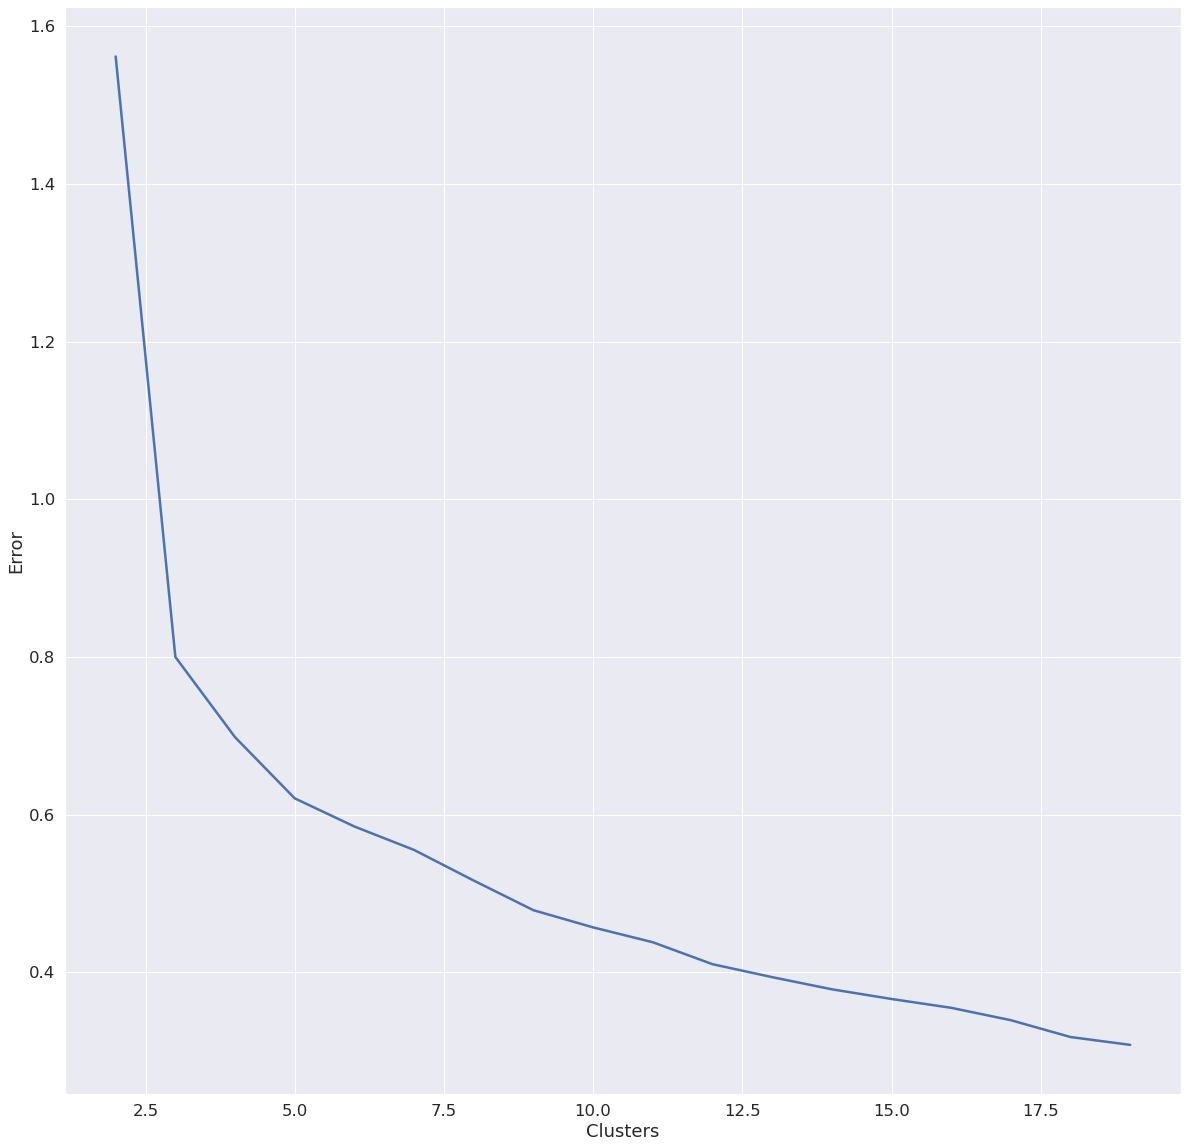

In [18]:
_ = _visualization.plot_cluster_errors(Ks,Js)

* It seems thare are too many columns, the number of clusters is almost the same of the number of samples

## Using a dendogram

We are using lastP as metric for the linkage method:

"The last p non-singleton formed in the linkage are the only non-leaf nodes in the linkage; they correspond to rows Z[n-p-2:end] in Z. All other non-singleton clusters are contracted into leaf nodes."

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

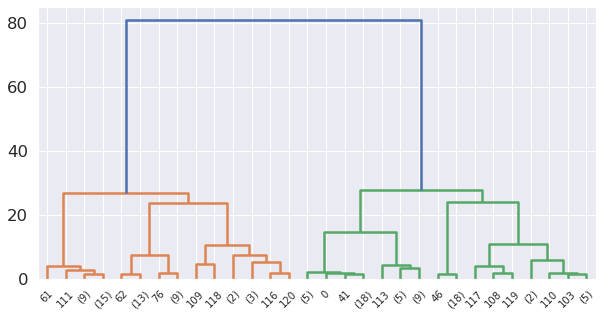

In [19]:
from importlib import reload
reload(_optimizer)
X_linked = _optimizer.linkage_cluster_dendogram(df_products_out)

In [20]:
clusters = _optimizer.fcluster_cut(df_products_out.values, max_d=2)
clusters.shape, len(np.unique(clusters))

((130,), 19)

In [21]:
df_products_out['hc_cluster'] = clusters

In [22]:
df_products_out[['kmeans_cluster', 'hc_cluster']].reset_index().groupby(['kmeans_cluster', 'hc_cluster']).count()

,,code
kmeans_cluster,hc_cluster,
0,15,19
1,18,2
2,16,2
3,19,7
4,11,25
5,17,1
6,14,1
7,13,9
8,12,5


/home/gorigan/anaconda3/envs/ml2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

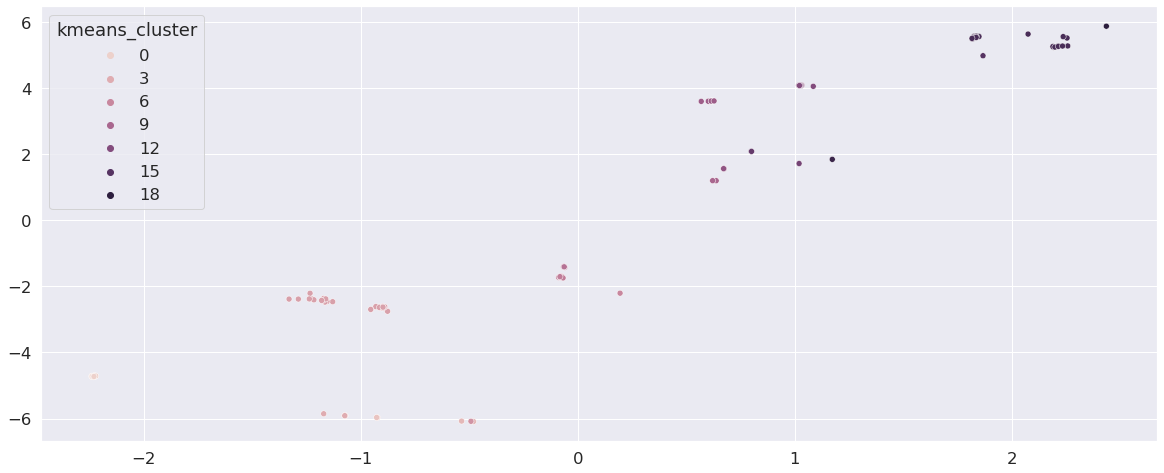

In [23]:
tsne_labels = _visualization.create_tsne_labels(df_products_out)
sns.scatterplot(tsne_labels[:,0], tsne_labels[:,1], hue=df_products_out['kmeans_cluster'])

/home/gorigan/anaconda3/envs/ml2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

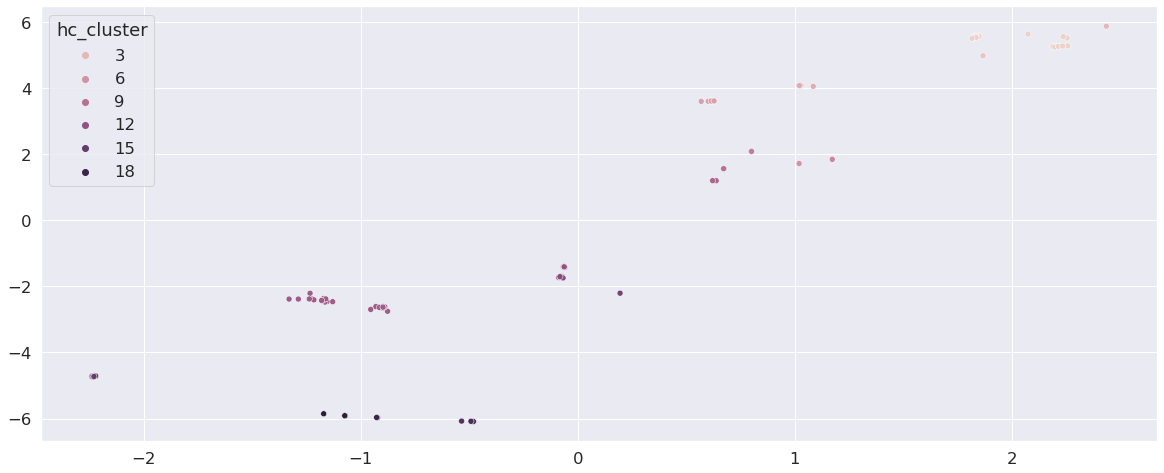

In [24]:
sns.scatterplot(tsne_labels[:,0], tsne_labels[:,1], hue=df_products_out['hc_cluster'])

In [25]:
_metrics.applyAllMetrics(df_products_out,df_products_out.kmeans_cluster)

Davies Bouldin
0.3019319790000643

Calinski and Harabaz
1400.0710492321584

Silhouette Score
0.6896723763804941



In [26]:
_metrics.applyAllMetrics(df_products_out,df_products_out.hc_cluster)

Davies Bouldin
0.3019319790000643

Calinski and Harabaz
1400.0710492321587

Silhouette Score
0.6896723763804941



In [27]:
df_products_out.drop(columns=['hc_cluster', 'kmeans_cluster']).to_csv('../data/products_features_exp5.csv')